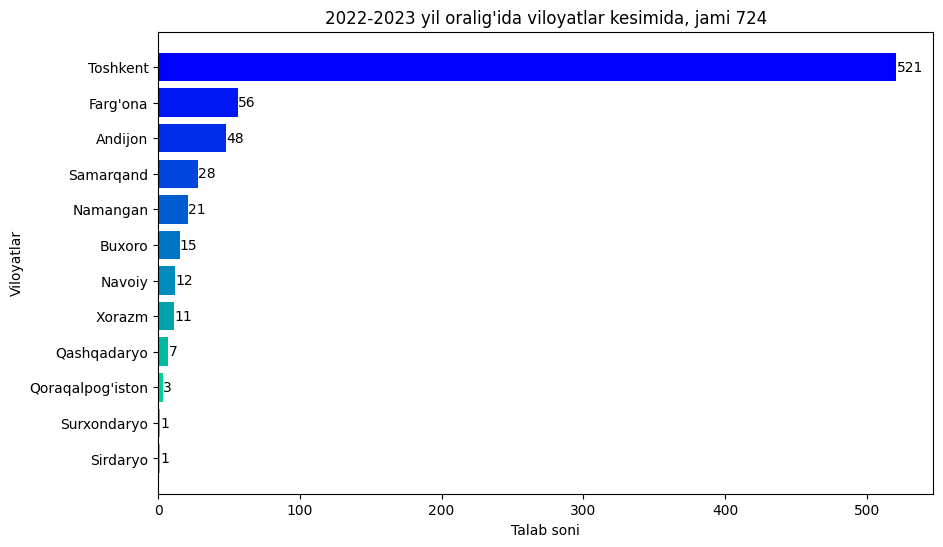

In [4]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from fuzzywuzzy import process
import matplotlib

matplotlib.rcParams['font.family'] = 'DejaVu Sans'

with open('../datasets/workers.json', 'r', encoding='utf-8') as file:
    data = json.load(file)


locations = [
    "toshkent",
    "sirdaryo",
    "jizzax",
    "samarqand",
    "qashqadaryo",
    "surxondaryo",
    "navoiy",
    "buxoro",
    "xorazm",
    "farg'ona",
    "andijon",
    "namangan",
    "qoraqalpog'iston"
]

technologies_list = []
for record in data:
    loc = record.get('location', '').strip().lower()
    if loc:
        best_match, match_score = process.extractOne(loc, locations)
        if match_score > 70:
            technologies_list.append(best_match)

for i, index in enumerate(technologies_list):
    technologies_list[i] = index.capitalize()

tech_counter = Counter(technologies_list)
most_common_techs = tech_counter.most_common(13)

tech_names, tech_counts = zip(*most_common_techs)

colors = plt.cm.winter(np.linspace(0, 1, len(tech_counts)))

plt.figure(figsize=(10, 6))
bars = plt.barh(tech_names, tech_counts, color=colors)
plt.barh(tech_names, tech_counts, color=colors)
plt.xlabel('Talab soni')
plt.ylabel('Viloyatlar')
plt.title(f'2022-2023 yil oralig\'ida viloyatlar kesimida, jami {len(technologies_list)}')
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height() / 2,
             f'{int(width)}', va='center')

plt.show()
